In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Logistic regression default

c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Default (with enrolled)
Dropout F1 Score: 0.7884788248861849
Dropout F1 Score var: 0.00044873606423656234
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80       284
    Enrolled       0.54      0.34      0.42       159
    Graduate       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



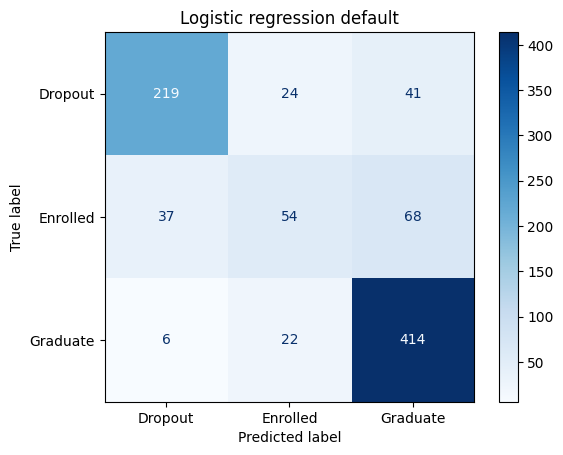

In [2]:
max_iter=10000
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []
for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

print("Default (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred=preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Default (without enrolled)
Dropout F1 Score: 0.8867469860140809
Dropout F1 Score var: 0.0001743219117517682
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.94      0.85      0.89       284
    Graduate       0.91      0.96      0.94       442

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


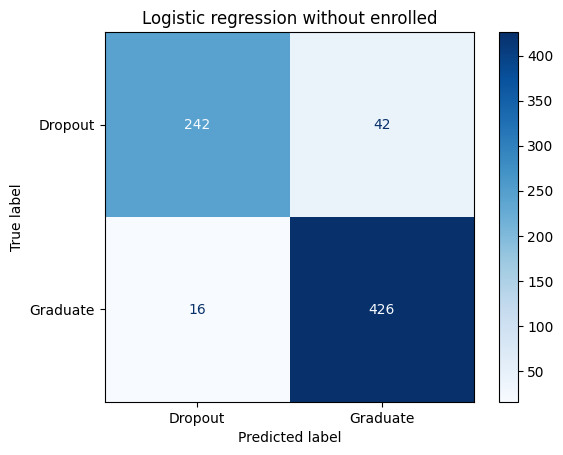

In [3]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)


print("Default (without enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Random forest classifier with default parameters (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.79178344980267
Dropout F1 Score var: 0.0002099690918478064
Wilcoxon 0.0006533107814151377
              precision    recall  f1-score   support

     Dropout       0.84      0.75      0.79       284
    Enrolled       0.56      0.34      0.42       159
    Graduate       0.77      0.94      0.85       442

    accuracy                           0.77       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.77      0.75       885



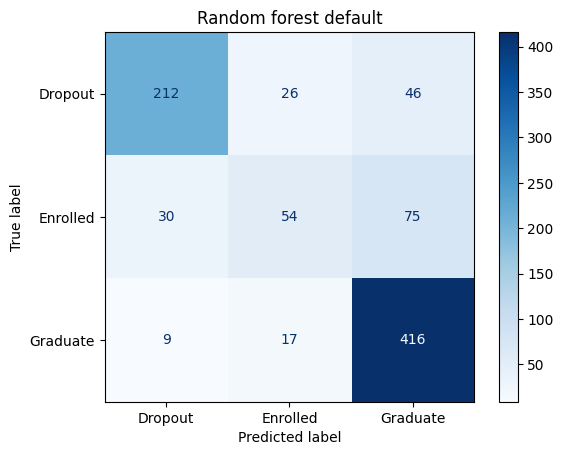

In [4]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(15):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    
print("Random forest (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier with default parameters (without enrolled)


=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8712
Std Dev: 0.0119
Min: 0.8528, Max: 0.8893


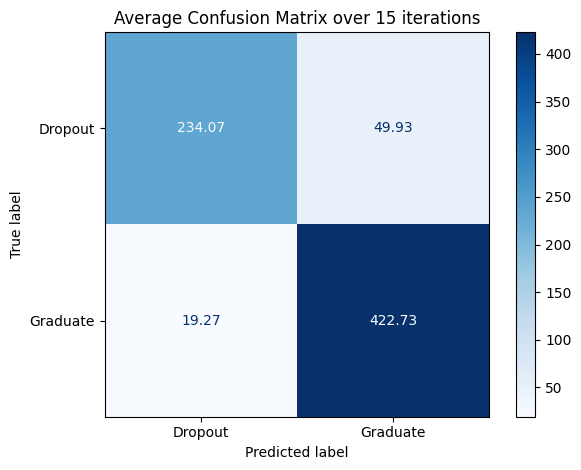

In [5]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    # print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Tentaremos encontrar os hiperparametros ideias com o optuna

c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Best trial F1 score: 0.8902874368113741
Best parameters:
  n_estimators: 283
  max_depth: 51
  min_samples_split: 8
  min_samples_leaf: 2
  max_features: log2
  bootstrap: False

Evaluation Results:
Dropout F1 Score (mean): 0.8791020080700175
Dropout F1 Score (std): 0.009770738932750898
Dropout F1 Score (var): 9.546733929197418e-05
Wilcoxon p-value: 6.103515625e-05

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88      4260
    Graduate       0.90      0.96      0.93      6630

    accuracy                           0.91     10890
   macro avg       0.92      0.90      0.90     10890
weighted avg       0.91      0.91      0.91     10890



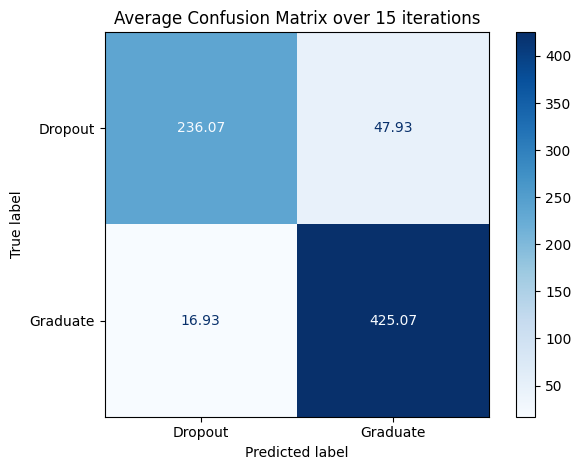

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import optuna
from scipy.stats import wilcoxon
from tqdm import tqdm

# Load and prepare data
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# Load best study
study = optuna.load_study(
    study_name="random_forest_optuna",
    storage="sqlite:///random_forest.db"
)
best_trial = study.best_trial
print(f"Best trial F1 score: {best_trial.value}")
print("Best parameters:")
for k, v in best_trial.params.items():
    print(f"  {k}: {v}")

# Evaluation settings
n_iterations = 15
dropout_f1_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))
all_preds = []
all_y_test = []

# Sequential evaluation with progress bar
for i in range(n_iterations):
    # Create train-test split with different random state each time
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )
    
    # Create model with best parameters
    model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )
    
    # Train and evaluate
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Calculate metrics
    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    
    # Store results
    dropout_f1_scores.append(f1_score_per_class[dropout_index])
    conf_matrix_total += confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    all_preds.extend(preds)
    all_y_test.extend(y_test)

# Calculate statistics
avg_conf_matrix = conf_matrix_total / n_iterations
statistic, pvalue = wilcoxon(dropout_f1_scores)

# Print results
print("\nEvaluation Results:")
print("Dropout F1 Score (mean):", np.mean(dropout_f1_scores))
print("Dropout F1 Score (std):", np.std(dropout_f1_scores))
print("Dropout F1 Score (var):", np.var(dropout_f1_scores))
print("Wilcoxon p-value:", pvalue)

print("\nClassification Report:")
print(classification_report(all_y_test, all_preds, target_names=le.classes_))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title(f"Average Confusion Matrix over {n_iterations} iterations")
plt.tight_layout()
plt.show()

Agora aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

Scaler

Random Forest (Optuna-selected scalers, without 'Enrolled')
Dropout F1 Score (mean): 0.8632699172022714
Dropout F1 Score (var): 0.00012812549961653896
Wilcoxon p-value: 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.96      0.79      0.87       284
    Graduate       0.88      0.98      0.93       442

    accuracy                           0.90       726
   macro avg       0.92      0.88      0.90       726
weighted avg       0.91      0.90      0.90       726



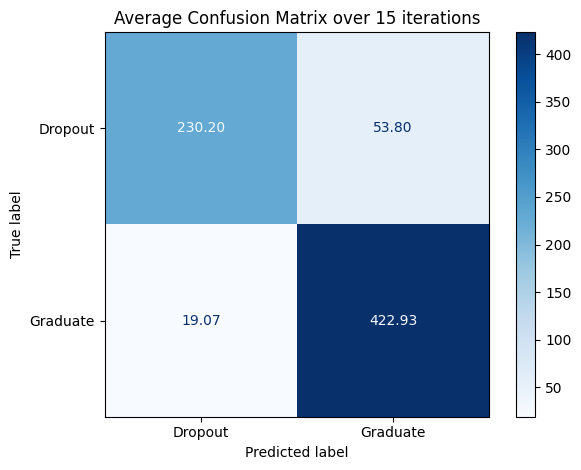

In [7]:
import pandas as pd
import numpy as np
import optuna
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# === 1. Load and prepare data ===
df = pd.read_csv("predict_students_dropout_and_academic_success.csv")
df = df[df["Target"] != "Enrolled"]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === 2. Load best Optuna study ===
study = optuna.load_study(study_name="no-name-7d86f460-e62a-450d-ad4f-d09a17fa12dc", 
                          storage="sqlite:///random_forest_scaler.db")
best_trial = study.best_trial

# === 3. Define scaler options ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# === 4. Rebuild pipeline based on best trial ===
transformers = []
for col in X.columns:
    key = f"scaler_{col}"
    scaler_name = best_trial.params.get(key, "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_name], [col]))

preprocessor = ColumnTransformer(transformers)

# === 5. Evaluate RandomForest with selected preprocessing 15 times ===
dropout_f1_score_values = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    pipeline = Pipeline([
        ("scaler", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
# === 6. Print results ===
print("Random Forest (Optuna-selected scalers, without 'Enrolled')")
print("Dropout F1 Score (mean):", np.mean(dropout_f1_score_values))
print("Dropout F1 Score (var):", np.var(dropout_f1_score_values))

statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)

print(classification_report(y_test, preds, target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()


PCA

Iteration 1 - Dropout F1 Score: 0.8644
Iteration 2 - Dropout F1 Score: 0.8663
Iteration 3 - Dropout F1 Score: 0.8667
Iteration 4 - Dropout F1 Score: 0.8665
Iteration 5 - Dropout F1 Score: 0.8435
Iteration 6 - Dropout F1 Score: 0.8739
Iteration 7 - Dropout F1 Score: 0.8812
Iteration 8 - Dropout F1 Score: 0.8731
Iteration 9 - Dropout F1 Score: 0.8271
Iteration 10 - Dropout F1 Score: 0.8459
Iteration 11 - Dropout F1 Score: 0.8630
Iteration 12 - Dropout F1 Score: 0.8333
Iteration 13 - Dropout F1 Score: 0.8777
Iteration 14 - Dropout F1 Score: 0.8725
Iteration 15 - Dropout F1 Score: 0.8391

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8596
Std Dev: 0.0166
Min: 0.8271, Max: 0.8812
Wilcoxon p-value: 6.103515625e-05


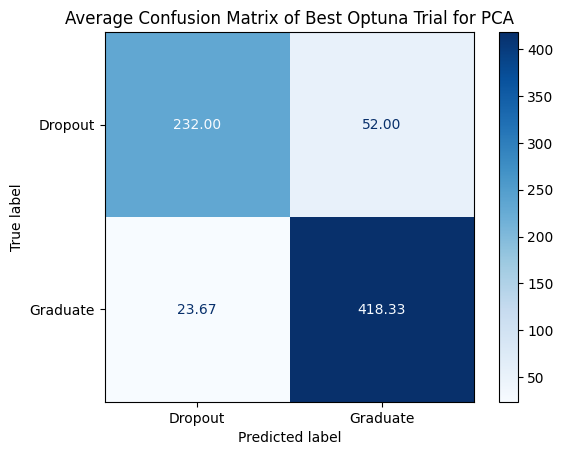

In [8]:
import pandas as pd
import numpy as np
import optuna
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load the dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load the study ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///pca.db"
)

best_params = study.best_trial.params

# === Reconstruct the pipeline using the best params ===
n_components = best_params["pca__n_components"]
svd_solver = best_params["pca__svd_solver"]
whiten = best_params["pca__whiten"]

# Adjust if using arpack
if svd_solver == "arpack":
    n_components = min(n_components, X.shape[1] - 1)

pca = PCA(
    n_components=n_components,
    svd_solver=svd_solver,
    whiten=whiten
)

model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

pipe = Pipeline([
    ("pca", pca),
    ("classifier", model)
])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for PCA")
plt.show()

RFE

Iteration 1 - Dropout F1 Score: 0.8785
Iteration 2 - Dropout F1 Score: 0.8800
Iteration 3 - Dropout F1 Score: 0.8913
Iteration 4 - Dropout F1 Score: 0.8897
Iteration 5 - Dropout F1 Score: 0.8942
Iteration 6 - Dropout F1 Score: 0.8686
Iteration 7 - Dropout F1 Score: 0.8851
Iteration 8 - Dropout F1 Score: 0.8831
Iteration 9 - Dropout F1 Score: 0.8684
Iteration 10 - Dropout F1 Score: 0.8897
Iteration 11 - Dropout F1 Score: 0.9024
Iteration 12 - Dropout F1 Score: 0.8668
Iteration 13 - Dropout F1 Score: 0.8801
Iteration 14 - Dropout F1 Score: 0.8794
Iteration 15 - Dropout F1 Score: 0.8771

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8823
Std Dev: 0.0098
Min: 0.8668, Max: 0.9024
Wilcoxon p-value: 6.103515625e-05


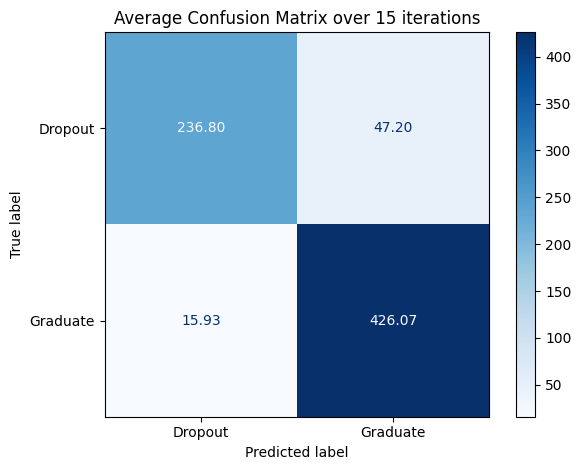

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import optuna

# === Load dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]  # remove "Enrolled" class

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best study from database ===
study_name = "no-name-4edeb741-7c80-4857-9a8a-47563ca4f188"
storage = "sqlite:///rfe.db"

study = optuna.load_study(study_name=study_name, storage=storage)
best_params = study.best_params

# === Rebuild the pipeline using best trial parameters ===
model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

rfe = RFE(
    estimator=model,
    n_features_to_select=best_params["rfe__n_features_to_select"],
    step=best_params["rfe__step"]
)
pipe = Pipeline([
    ("rfe", rfe),
    ("classifier", model)
])

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()


Scaler, PCA e RFE 

Iteration 1 - Dropout F1 Score: 0.8759
Iteration 2 - Dropout F1 Score: 0.8686
Iteration 3 - Dropout F1 Score: 0.8762
Iteration 4 - Dropout F1 Score: 0.8620
Iteration 5 - Dropout F1 Score: 0.8790
Iteration 6 - Dropout F1 Score: 0.8759
Iteration 7 - Dropout F1 Score: 0.8701
Iteration 8 - Dropout F1 Score: 0.8922
Iteration 9 - Dropout F1 Score: 0.8759
Iteration 10 - Dropout F1 Score: 0.8710
Iteration 11 - Dropout F1 Score: 0.8873
Iteration 12 - Dropout F1 Score: 0.8646
Iteration 13 - Dropout F1 Score: 0.8876
Iteration 14 - Dropout F1 Score: 0.8736
Iteration 15 - Dropout F1 Score: 0.8619

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8748
Std Dev: 0.0088
Min: 0.8619, Max: 0.8922
Wilcoxon p-value: 6.103515625e-05


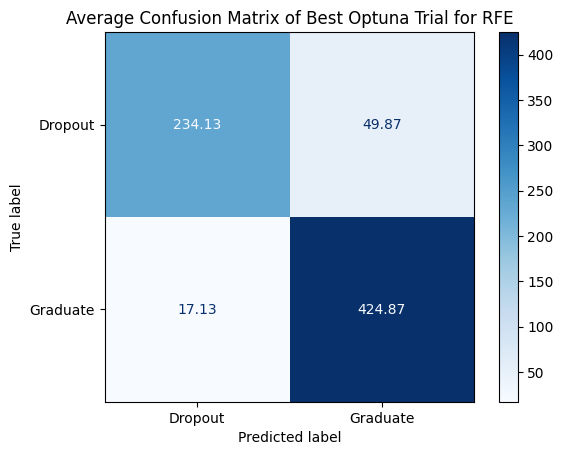

In [10]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best study trial ===
study = optuna.load_study(
    study_name="optimized_study",
    storage="sqlite:///scaler_pca_rfe.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline from best trial ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optionally add PCA ===
if best_trial.params.get("pca_usage") == "pca":
    pca = PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )
    steps.append(("pca", pca))

# === Optionally add RFE ===
model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

# === Final classifier ===
steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index + 1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for RFE")
plt.show()


XGBoost com scaler, RFE e PCA

Iteration 1 - Dropout F1 Score: 0.8897
Iteration 2 - Dropout F1 Score: 0.8959
Iteration 3 - Dropout F1 Score: 0.8648
Iteration 4 - Dropout F1 Score: 0.8697
Iteration 5 - Dropout F1 Score: 0.9077
Iteration 6 - Dropout F1 Score: 0.9048
Iteration 7 - Dropout F1 Score: 0.8889
Iteration 8 - Dropout F1 Score: 0.8731
Iteration 9 - Dropout F1 Score: 0.9057
Iteration 10 - Dropout F1 Score: 0.8812
Iteration 11 - Dropout F1 Score: 0.8712
Iteration 12 - Dropout F1 Score: 0.8587
Iteration 13 - Dropout F1 Score: 0.8861
Iteration 14 - Dropout F1 Score: 0.9094
Iteration 15 - Dropout F1 Score: 0.8810

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8859
Std Dev: 0.0159
Min: 0.8587, Max: 0.9094
Wilcoxon p-value: 6.103515625e-05


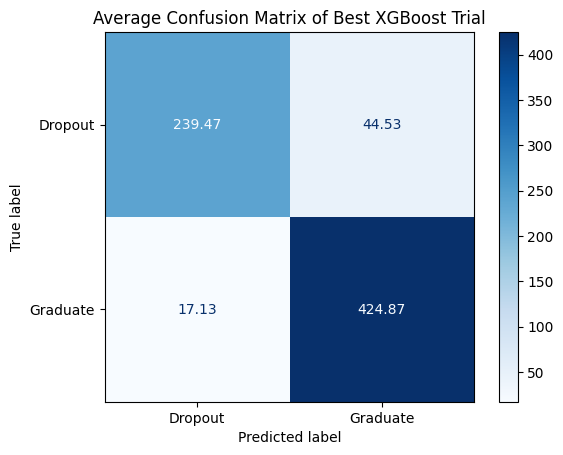

In [11]:
import pandas as pd
import numpy as np
import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and preprocess dataset
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.drop(columns="Target")
y = df["Target"]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best Optuna study ===
study = optuna.load_study(
    study_name="xgboost_pipeline",
    storage="sqlite:///xgboost_pipeline.db"
)
best_trial = study.best_trial

# === Rebuild pipeline ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# Column Transformer
transformers = []
for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# PCA
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# Model
model = XGBClassifier(
    n_estimators=best_trial.params["n_estimators"],
    max_depth=best_trial.params["max_depth"],
    learning_rate=best_trial.params["learning_rate"],
    subsample=best_trial.params["subsample"],
    colsample_bytree=best_trial.params["colsample_bytree"],
    gamma=best_trial.params["gamma"],
    reg_alpha=best_trial.params["reg_alpha"],
    reg_lambda=best_trial.params["reg_lambda"],
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=0
)

# RFE
if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate best pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1s = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1s[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1s[dropout_index]:.4f}")

# === Summary statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Average Confusion Matrix ===
avg_cm = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best XGBoost Trial")
plt.show()


Catboost com scaler, PCA e RFE

Iteration 1 - Dropout F1 Score: 0.8844
Iteration 2 - Dropout F1 Score: 0.8785
Iteration 3 - Dropout F1 Score: 0.8832
Iteration 4 - Dropout F1 Score: 0.8651
Iteration 5 - Dropout F1 Score: 0.8807
Iteration 6 - Dropout F1 Score: 0.8712
Iteration 7 - Dropout F1 Score: 0.8954
Iteration 8 - Dropout F1 Score: 0.8740
Iteration 9 - Dropout F1 Score: 0.8588
Iteration 10 - Dropout F1 Score: 0.8868
Iteration 11 - Dropout F1 Score: 0.8722
Iteration 12 - Dropout F1 Score: 0.8704
Iteration 13 - Dropout F1 Score: 0.8717
Iteration 14 - Dropout F1 Score: 0.8684
Iteration 15 - Dropout F1 Score: 0.8852

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8764
Std Dev: 0.0093
Min: 0.8588, Max: 0.8954
Wilcoxon p-value: 6.103515625e-05


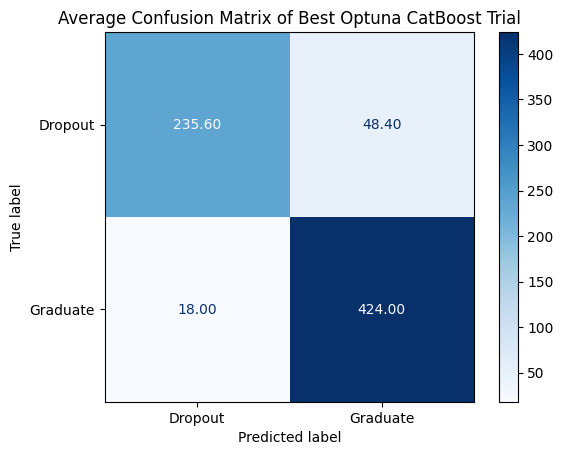

In [12]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best Optuna trial for CatBoost ===
study = optuna.load_study(
    study_name="catboost_pipeline",  # Replace with your actual CatBoost study name
    storage="sqlite:///catboost_pipeline.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optional PCA ===
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# === CatBoost Classifier with best parameters ===
model = CatBoostClassifier(
    iterations=best_trial.params["iterations"],
    depth=best_trial.params["depth"],
    learning_rate=best_trial.params["learning_rate"],
    l2_leaf_reg=best_trial.params["l2_leaf_reg"],
    # subsample=best_trial.params["subsample"],
    random_strength=best_trial.params["random_strength"],
    verbose=0
)

# === Optional RFE ===
if best_trial.params.get("rfe_usage") == "rfe":
    steps.append(("rfe", RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate the pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_scores = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1_scores[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1_scores[dropout_index]:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna CatBoost Trial")
plt.show()


- Catboost
  - 0.8764

- XGBoost
  - 0.8859

- Random Forest (all)
  - 0.8748

- Random Forest RFE
  - 0.8823

- Random Forest PCA
  - 0.8596

- Random Forest Scaler
  - 0.8632